In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import fetch_openml
import pickle
from scipy.special import expit
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import softmax



In [17]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = np.asarray([int(numeric_string) for numeric_string in y])

class0Indices = (y==0)
class1Indices = (y==1)
class2Indices = (y==2)
class3Indices = (y==3)
class4Indices = (y==4)
class5Indices = (y==5)
class6Indices = (y==6)
class7Indices = (y==7)
class8Indices = (y==8)
class9Indices = (y==9)

x0 = X[class0Indices]
x1 = X[class1Indices]
x2 = X[class2Indices]
x3 = X[class3Indices]
x4 = X[class4Indices]
x5 = X[class5Indices]
x6 = X[class6Indices]
x7 = X[class7Indices]
x8 = X[class8Indices]
x9 = X[class9Indices]

Xtrain = np.concatenate((x0,x1,x2,x3,x4,x5,x6,x7,x8,x9),axis=0)

ytrain = np.concatenate((np.zeros(x0.shape[0]),np.ones(x1.shape[0]),
                        2*np.ones(x2.shape[0]),3*np.ones(x3.shape[0]),
                        4*np.ones(x4.shape[0]),5*np.ones(x5.shape[0]),
                        6*np.ones(x6.shape[0]),7*np.ones(x7.shape[0]),
                        8*np.ones(x8.shape[0]),9*np.ones(x9.shape[0])),axis=0)


# Saving the temporary variables for fast retrieval
with open('temp1.pickle', 'wb') as handle:
    pickle.dump([Xtrain, ytrain], handle)



In [18]:
print(x0.shape)
print(x1.shape)

(6903, 784)
(7877, 784)


In [19]:
# loading the temporary variables for fast retrieval
with open('temp1.pickle', 'rb') as handle:
    Xtrain, ytrain = pickle.load(handle)
    
# Split the data to training, testing, and validation subsets
    
X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size=0.3, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.14, random_state=1) # 0.25 x 0.8 = 0.2


Nsamples = X_train.shape[0]
Nfeatures = X_train.shape[1]

print("Number of samples: ", Nsamples)
print("Number of features: ", Nfeatures)

Number of samples:  42139
Number of features:  784


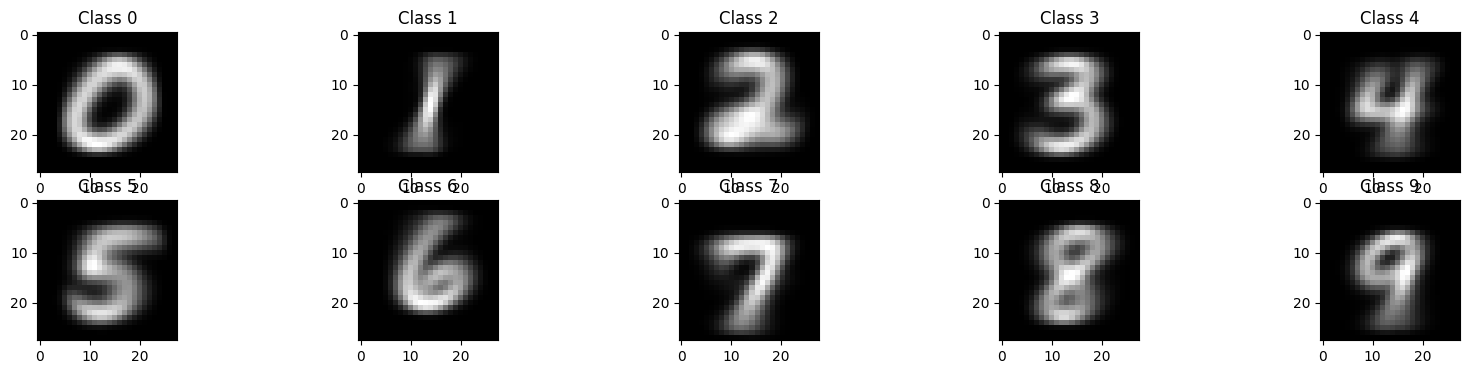

In [20]:
# find the mean of each feature
mu0 = np.mean(X_train[y_train==0],axis=0)
mu1 = np.mean(X_train[y_train==1],axis=0)
mu2 = np.mean(X_train[y_train==2],axis=0)
mu3 = np.mean(X_train[y_train==3],axis=0)
mu4 = np.mean(X_train[y_train==4],axis=0)
mu5 = np.mean(X_train[y_train==5],axis=0)
mu6 = np.mean(X_train[y_train==6],axis=0)
mu7 = np.mean(X_train[y_train==7],axis=0)
mu8 = np.mean(X_train[y_train==8],axis=0)
mu9 = np.mean(X_train[y_train==9],axis=0)

# show images of the mean of each class
plt.figure(figsize=(20,4))
plt.subplot(2,5,1)
plt.imshow(mu0.reshape(28,28), cmap='gray')
plt.title("Class 0")
plt.subplot(2,5,2)
plt.imshow(mu1.reshape(28,28), cmap='gray')
plt.title("Class 1")
plt.subplot(2,5,3)
plt.imshow(mu2.reshape(28,28), cmap='gray')
plt.title("Class 2")
plt.subplot(2,5,4)
plt.imshow(mu3.reshape(28,28), cmap='gray')
plt.title("Class 3")
plt.subplot(2,5,5)
plt.imshow(mu4.reshape(28,28), cmap='gray')
plt.title("Class 4")
plt.subplot(2,5,6)
plt.imshow(mu5.reshape(28,28), cmap='gray')
plt.title("Class 5")
plt.subplot(2,5,7)
plt.imshow(mu6.reshape(28,28), cmap='gray')
plt.title("Class 6")
plt.subplot(2,5,8)
plt.imshow(mu7.reshape(28,28), cmap='gray')
plt.title("Class 7")
plt.subplot(2,5,9)
plt.imshow(mu8.reshape(28,28), cmap='gray')
plt.title("Class 8")
plt.subplot(2,5,10)
plt.imshow(mu9.reshape(28,28), cmap='gray')
plt.title("Class 9")
plt.show()



In [21]:
def showPlots(a):
    plt.figure(figsize=(20,4))
    plt.subplot(2,5,1)
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(np.reshape(a[i][0:784], (28,28)))
        plt.title("Class "+str(i))
    plt.show()

In [22]:
def testLinearMCClassifier(a_list,X,y):
    mList = []
    misclassifications = 0

    for i in range(10):
        a = a_list[i]
        my_x = X[y==i]
        y_label = y[y==i]
        
        y_pred = my_x @ a[:-1] + a[-1]
        y_pred[y_pred>=0] = i
        y_pred[y_pred<0] = 100
        
        mList.append(np.sum(y_pred!=y_label))
        misclassifications += np.sum(y_pred!=y_label)


    
    # print("Misclassifications: ", mList)
    return misclassifications 

    

In [23]:
Nsamples = X_train.shape[0]
Nfeatures = X_train.shape[1]

print("Number of samples: ", Nsamples)
print("Number of features: ", Nfeatures)

print(y_train.shape)

Number of samples:  42139
Number of features:  784
(42139,)


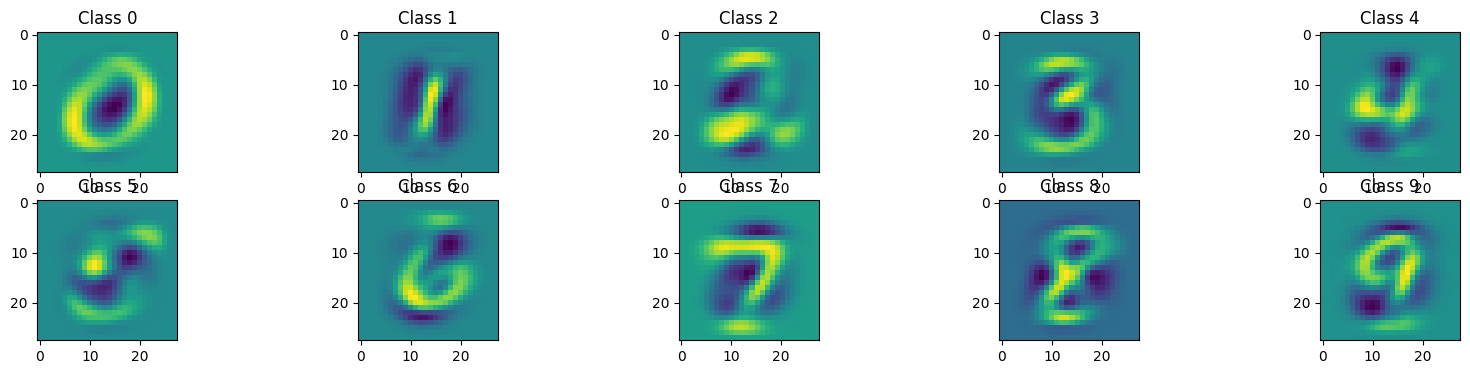

4567
749
2220


In [24]:
def gaussianMultiChannelClassifier(Xtrain, ytrain):
    a_list = np.zeros((10, Nfeatures+1))
    for i in range(10):
        ui = np.mean(Xtrain[ytrain==i],axis=0)
        u_xi = np.mean(Xtrain[ytrain!=i],axis=0)

        W_t = (ui-u_xi).T
        W_0 = -W_t @ (ui+u_xi)/2

        a = np.concatenate((W_t, W_0), axis=None)
        #print(a.shape)
        a_list[i] = a

    return a_list

a= gaussianMultiChannelClassifier(X_train, y_train)

showPlots(a)

train = testLinearMCClassifier(a,X_train,y_train)
val = testLinearMCClassifier(a,X_val,y_val)
test = testLinearMCClassifier(a,X_test,y_test)

print(train)
print(val)
print(test)
        

In [25]:
a_list = np.zeros((10, Xtrain.shape[1]+1))
print(a_list.shape)
print(X_train.shape)
X_mod = np.concatenate((X_train, np.ones((X_train.shape[0],1))), axis=1)
print(X_mod.shape)


(10, 785)
(42139, 784)
(42139, 785)


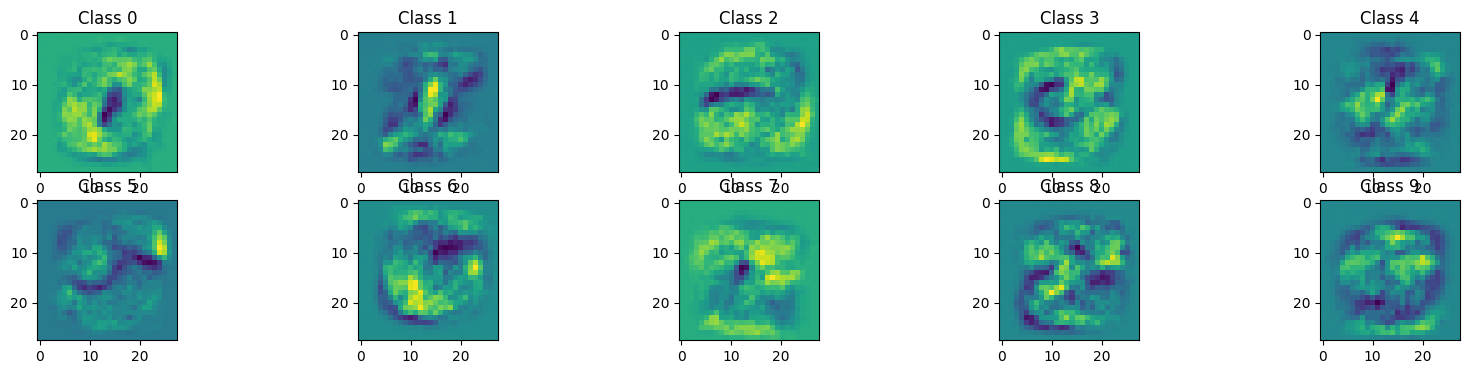

183
42
118


In [26]:
def logisticRegressionMultiClassClassifier(Xtrain,ytrain,iterations=100,step_size=1e-4,verbose=False):
    # Nsamples = X_train.shape[0]
    # Nfeatures = X_train.shape[1]
    # Number of samples:  42139
    # Number of features:  784

    a_list = np.random.randn(10, Xtrain.shape[1]+1)
    X_tilda = np.concatenate((Xtrain, np.ones((Xtrain.shape[0],1))), axis=1)
    y_one_hot = np.eye(10)[ytrain.astype(int)]
    #print(y_one_hot.shape)

    for i in range(iterations):
        P = X_tilda @ a_list.T
        Phi = softmax(P)
        Gradient = (Phi - y_one_hot).T @ X_tilda
        #print(a_list.shape)
        a_list = a_list - step_size * Gradient
    return a_list


a= logisticRegressionMultiClassClassifier(X_train,y_train,iterations=500,verbose=False)
showPlots(a)

#print(a[0].shape)
train = testLinearMCClassifier(a,X_train,y_train)
val = testLinearMCClassifier(a,X_val,y_val)
test = testLinearMCClassifier(a,X_test,y_test)

print(train)
print(val)
print(test)
    

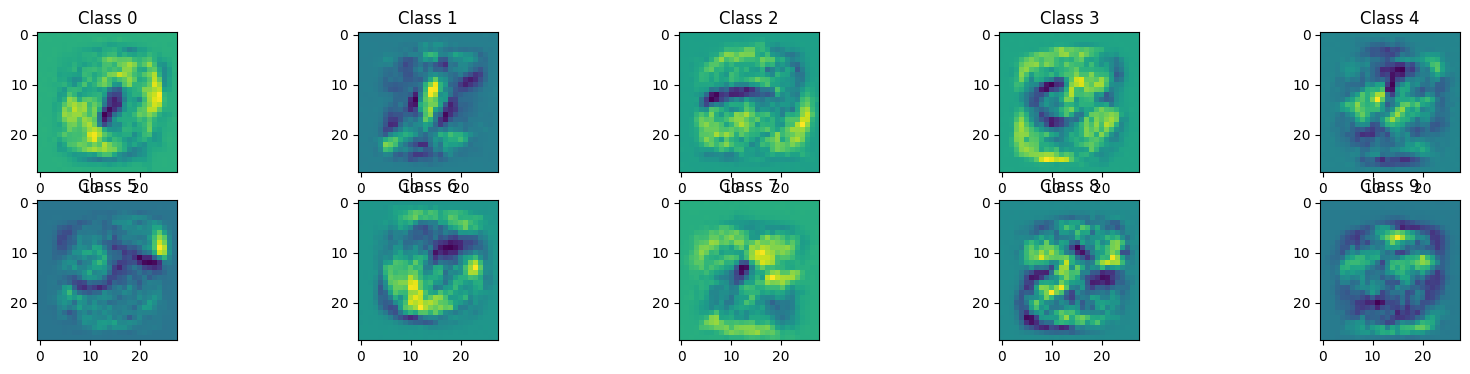

156
39
107


In [27]:
def logisticRegressionMultiClassClassifierWithRegularization(
        Xtrain,ytrain,iterations=100,step_size=1e-4,lam=0,verbose=False):
    # Nsamples = X_train.shape[0]
    # Nfeatures = X_train.shape[1]
    # Number of samples:  42139
    # Number of features:  784

    a_list = np.random.randn(10, Xtrain.shape[1]+1)
    X_tilda = np.concatenate((Xtrain, np.ones((Xtrain.shape[0],1))), axis=1)
    y_one_hot = np.eye(10)[ytrain.astype(int)]
    #print(y_one_hot.shape)

    for i in range(iterations):
        P = X_tilda @ a_list.T
        Phi = softmax(P)
        Gradient = (Phi - y_one_hot).T @ X_tilda
        gradient_regularization = 2* lam * a_list
        #print(a_list.shape)
        a_list = a_list - step_size * (Gradient + gradient_regularization)
    return a_list


a= logisticRegressionMultiClassClassifierWithRegularization(X_train, y_train, iterations=500, verbose=False, lam = 1)
showPlots(a)

#print(a[0].shape)
train = testLinearMCClassifier(a,X_train,y_train)
val = testLinearMCClassifier(a,X_val,y_val)
test = testLinearMCClassifier(a,X_test,y_test)

print(train)
print(val)
print(test)
    

In [28]:
def Optimize_MC_Hyperparameters(Xtrain,ytrain):
     
    # lambda from -10 to 10, 21 values
    lambda_list = np.linspace(0,10,21)

    iterations = 100
    step_size = 1e-4

    a_list = []
    misclassifications = []
    
    for i in range(len(lambda_list)):
        a = logisticRegressionMultiClassClassifierWithRegularization(
            Xtrain,ytrain,iterations,step_size,lambda_list[i],verbose=False)
        a_list.append(a)
        misclassifications.append(testLinearMCClassifier(a,X_val,y_val))
        
    min_index = np.argmin(misclassifications)
    lamopt = lambda_list[min_index]
        
    return lamopt

my_lamopt = Optimize_MC_Hyperparameters(X_train,y_train)


In [29]:
print("Optimized lambda: ", my_lamopt)

Optimized lambda:  3.0


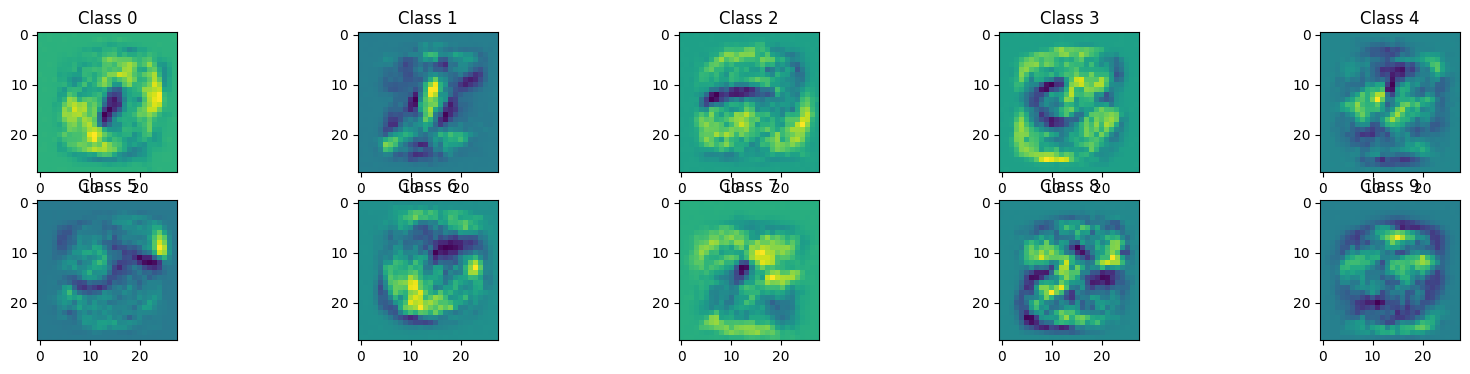

a1, a2, a3, a4
train [4567, 193, 166, 169]
val [749, 46, 39, 40]
test [2220, 116, 110, 110]


In [30]:
my_a_list = []
train_list = []
val_list = []
test_list = []

a1 = gaussianMultiChannelClassifier(X_train, y_train)
a2 = logisticRegressionMultiClassClassifier(X_train, y_train, iterations=500, verbose=False)
a3 = logisticRegressionMultiClassClassifierWithRegularization(X_train, y_train, iterations=500, verbose=False, lam = 1)
a4 = logisticRegressionMultiClassClassifierWithRegularization(X_train, y_train, iterations=500, verbose=False, lam = my_lamopt)

showPlots(a4)

my_a_list.append(a1)
my_a_list.append(a2)
my_a_list.append(a3)
my_a_list.append(a4)

for i in range(len(my_a_list)):
    train_list.append(testLinearMCClassifier(my_a_list[i],X_train,y_train))
    val_list.append(testLinearMCClassifier(my_a_list[i],X_val,y_val))
    test_list.append(testLinearMCClassifier(my_a_list[i],X_test,y_test))

print("a1, a2, a3, a4")
print("train", train_list)
print("val", val_list)
print("test", test_list)